In [16]:
import zipfile
from zipfile import ZipFile
from PIL import Image
import PIL
import pytesseract
import cv2 as cv
import numpy as np
import pytesseract

# loading the face detection classifier and test files
face_cascade = cv.CascadeClassifier('src/haarcascade_frontalface_default.xml')
pretest_zip_path = "src/image_data/small_img.zip"
test_zip_path = "src/image_data/images.zip"

In [17]:
pytesseract.pytesseract.tesseract_cmd = 'src/tesseract_documents/tesseract.exe'

In [19]:
info_dict = {}
with zipfile.ZipFile(pretest_zip_path) as zip_file:
    file_names = zip_file.namelist()
    for name in file_names:
        with zip_file.open(name) as file:
            cv_image = cv.imdecode(np.frombuffer(file.read(), np.uint8), 1) #this line from stackoverflow
                
            gray = cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                
            pil_image = Image.open(file)
                
            text = pytesseract.image_to_string(pil_image)
         
            info_dict[name] = [pil_image, text, faces]    

In [20]:
word = "Christopher"

Results found in file a-0.png


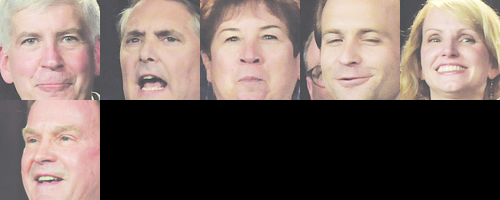

Results found in file a-3.png


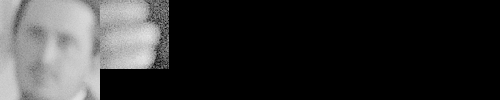

In [21]:
keys = list(info_dict.keys())
for key in keys:
    if word in info_dict[key][1]:  
        image = info_dict[key][0] 
        faces = info_dict[key][2]  
            
        if len(faces) > 0:
                sheet_w = 100
                sheet_h = 100
                rows = int(np.ceil(len(faces) / 5))
                sheet = PIL.Image.new(image.mode, (sheet_w * 5, sheet_h * rows))
                r = 0  
                c = 0  
                for x, y, w, h in faces:
                    crop = image.crop((x, y, x+w, y+h))
                    if crop.width > sheet_w:
                        crop = crop.resize((100, 100))
                        sheet.paste(crop, (r, c))

                    else:
                        sheet.paste(crop, (r, c))
                    if crop.width + r == sheet.width:
                        r = 0
                        c += crop.height
                    else:
                        r += sheet_w

                # Resize contact sheet
                sheet = sheet.resize((int(sheet.width), int(sheet.height)))
                # Print and display results
                print("Results found in file {}".format(key))
                display(sheet)

        
        else:
            print("Results found in file {}".format(key))
            print("But there were no faces in that file!")

In [23]:
info_dict = {}
with zipfile.ZipFile(test_zip_path) as zip_file:
    file_names = zip_file.namelist()
    for name in file_names:
        with zip_file.open(name) as file:
            cv_image = cv.imdecode(np.frombuffer(file.read(), np.uint8), 1) #this line from stackoverflow
                
            gray = cv.cvtColor(cv_image, cv.COLOR_BGR2GRAY)
            faces = face_cascade.detectMultiScale(gray, 1.3, 5)
                
            pil_image = Image.open(file)
                
            text = pytesseract.image_to_string(pil_image)
         
            info_dict[name] = [pil_image, text, faces]    
         

In [24]:
word ="Mark"

Results found in file a-0.png


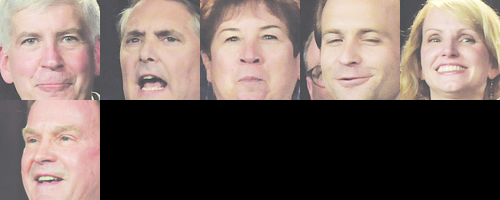

Results found in file a-1.png


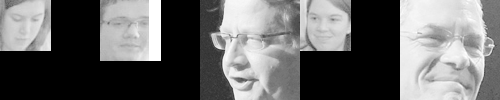

Results found in file a-10.png
But there were no faces in that file!
Results found in file a-13.png


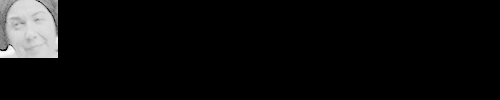

Results found in file a-2.png


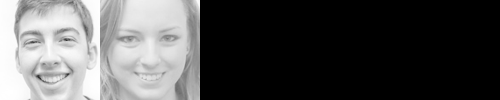

Results found in file a-3.png


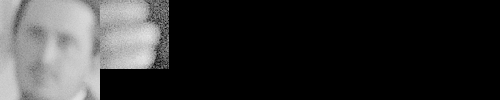

Results found in file a-8.png
But there were no faces in that file!


In [25]:
keys = list(info_dict.keys())
for key in keys:
    if word in info_dict[key][1]:  
        image = info_dict[key][0] 
        faces = info_dict[key][2]  
            
        if len(faces) > 0:
                sheet_w = 100
                sheet_h = 100
                rows = int(np.ceil(len(faces) / 5))
                sheet = PIL.Image.new(image.mode, (sheet_w * 5, sheet_h * rows))
                r = 0  
                c = 0  
                for x, y, w, h in faces:
                    crop = image.crop((x, y, x+w, y+h))
                    if crop.width > sheet_w:
                        crop = crop.resize((100, 100))
                        sheet.paste(crop, (r, c))

                    else:
                        sheet.paste(crop, (r, c))
                    if crop.width + r == sheet.width:
                        r = 0
                        c += crop.height
                    else:
                        r += sheet_w

                # Resize contact sheet
                sheet = sheet.resize((int(sheet.width), int(sheet.height)))
                # Print and display results
                print("Results found in file {}".format(key))
                display(sheet)

        
        else:
            print("Results found in file {}".format(key))
            print("But there were no faces in that file!")